In [855]:
import sys
import math
import warnings
import numpy as np
import matplotlib.pylab as plt

from Learning import Learning
from Drawing import Plotter
from Utils import Utils
from Utils import ArgsParser
from Environment import GridWorld
from MDPStats import MDPStats
from main import discoverOptions
from QLearning import QLearning
from Drawing import Plotter
from option import Option
from PR_options import discover_PRSR,findNoWallState,findOptionStartEnd,discover_option_policy,add_premitive_actions
from LearningOption import IntraOptionQLearningAgent

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [558]:
env_path='/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/mdps/4Rooms.mdp'
PR_ave,SR_ave,indeces=discover_PRSR(env_path,gamma_learn=0.9,gamma_PR=0.9,simulate_num=200)

In [537]:
starts=[(3,9),(3,3),(9,3),(9,9)]
starts_subgoals_x_y,SR_random=findOptionStartEnd(env_path,PR_ave,8,starts)

In [538]:
starts_subgoals_x_y

[(48, 46, 3, 9, 3, 7),
 (48, 47, 3, 9, 3, 8),
 (42, 44, 3, 3, 3, 5),
 (42, 67, 3, 3, 5, 2),
 (120, 93, 9, 3, 7, 2),
 (120, 135, 9, 3, 10, 5),
 (126, 113, 9, 9, 8, 9),
 (126, 137, 9, 9, 10, 7)]

### Visualize PR, SR and potential subgoals if agent start at a paticular state

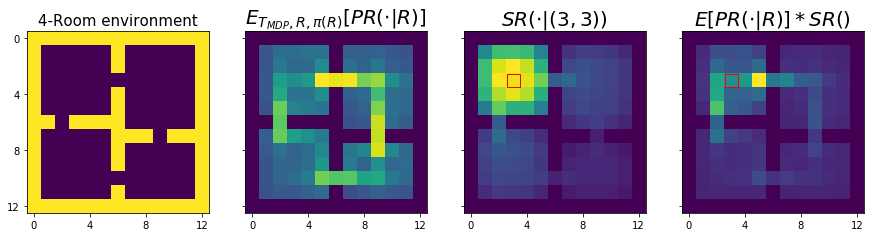

In [619]:
# Visualize PR_ave vs PR
from PR_options import visualize_vec
from mpl_toolkits.axes_grid1 import make_axes_locatable

env_plot = GridWorld(path = env_path, useNegativeRewards=False)
indeces=findNoWallState(env_plot)

x=3
y=3
start_idx=env_plot._getStateIndex(x,y)
SR_random_start = visualize_vec(env_plot,SR_random[np.argwhere(indeces==start_idx)[0][0],:])

fig,axe=plt.subplots(1,4,figsize=(15,8),sharex=True, sharey=True)
axe[0].imshow(-env.matrixMDP)
axe[0].set_title('4-Room environment',fontsize=15)
axe[0].set_xticks([0,4,8,12])
axe[0].set_yticks([0,4,8,12])
#divider = make_axes_locatable(axe[0])

PCM=axe[1].imshow(0.1*env.matrixMDP+PR_ave)
axe[1].set_title('$E_{T_{MDP},R,\pi(R)}[PR(\cdot|R)]$',fontsize=20)
divider = make_axes_locatable(axe[1])
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(PCM,cax=cax)

PCM=axe[2].imshow(0.1*env.matrixMDP+SR_random_start)
axe[2].plot(y,x,lw=0, marker='s',color='red',fillstyle='none',markersize=13)
axe[2].set_title('$SR(\cdot|{(3,3)})$',fontsize=20)
divider = make_axes_locatable(axe[2])
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(PCM,cax=cax)

PCM=axe[3].imshow(0.1*env.matrixMDP+PR_ave*SR_random_start)
axe[3].plot(y,x,lw=0, marker='s',color='red',fillstyle='none',markersize=13)
axe[3].set_title('$E[PR(\cdot|R)]*SR()$',fontsize=20)

divider = make_axes_locatable(axe[3])
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(PCM,cax=cax)

104
104


/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:164: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.imshow(env1.matrixMDP+Pn)
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:168: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.savefig(figpath+str(o_ind)+'.png')
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project

104
104


/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:168: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.savefig(figpath+str(o_ind)+'.png')
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:171: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py

104
104


/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:164: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.imshow(env1.matrixMDP+Pn)
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:168: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.savefig(figpath+str(o_ind)+'.png')
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project

104
104


/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:168: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.savefig(figpath+str(o_ind)+'.png')
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py:171: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/PR_options.py

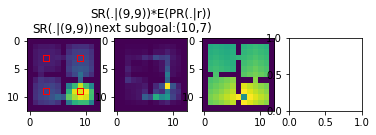

In [539]:
figpath='/Users/shijiegu/Documents/Second-Year/Bandit_RL/Hiearchical/Project/options-master/option_generation2/option_generation'
options=discover_option_policy(env_path,figpath,starts_subgoals_x_y,SR_random,PR_ave,SR_thresh=0.1)

In [540]:
premi_options=add_premitive_actions(env_path)

In [541]:
options_full=premi_options+options
print(len(options_full))

12


In [851]:
def make_test_env(env_path):
    env = GridWorld(path = env_path, useNegativeRewards=False)
    
    goal_idx=env._getStateIndex(1,11) #goal is upper right
    start_idx=env._getStateIndex(11,1) #start is lower left
    
    env.defineRewardFunction(None)
    env.defineGoalState(goal_idx)
    env.defineStartState(start_idx)
    return env

def run_one_experiment(env_path,options,EpisodeLen=100,EpisodeNum=500,testNum=100):

    agent=IntraOptionQLearningAgent(options)

    n_steps_all=np.zeros((testNum,EpisodeNum))
    cumulative_reward_all=np.zeros((testNum,EpisodeNum))

    for e in range(EpisodeNum):
        env=make_test_env(env_path)
        _,_2=agent.run_episode(env,max_stepnum=EpisodeLen,start_new=False,learning_flag=True,verbose=False)
        
        for t in range(testNum):
            env=make_test_env(env_path)
            n_steps,cumulative_reward=agent.run_episode(env,max_stepnum=EpisodeLen,start_new=False,learning_flag=False,verbose=False)
            n_steps_all[t,e]=n_steps
            cumulative_reward_all[t,e]=cumulative_reward
            
    return cumulative_reward_all,n_steps_all

def run_many_experiments(env_path,options,testNum,EpisodeNum,EpisodeLen):
    reward_tally_alloption=0
    for repeat in range(testNum):
        reward_tally_alloption_,nstep_tally_alloption=run_one_experiment(env_path,options,EpisodeLen=EpisodeLen,EpisodeNum=EpisodeNum,testNum=testNum)
        print('done repeat',repeat)
        reward_tally_alloption+=reward_tally_alloption_
    return reward_tally_alloption/testNum

In [542]:
testNum=20
EpisodeNum=500
EpisodeLen=100


reward_tally_alloption=run_many_experiments(env_path,options_full,testNum,EpisodeNum,EpisodeLen)
print('done')

reward_tally_2option=run_many_experiments(env_path,options_full[:6],EpisodeLen=EpisodeLen,EpisodeNum=EpisodeNum,testNum=testNum)
print('done')

#reward_tally_8option=run_many_experiments(env_path,options_full[:8],EpisodeLen=EpisodeLen,EpisodeNum=EpisodeNum,testNum=testNum)
#print('done')

reward_tally_premi=run_many_experiments(env_path,premi_options,EpisodeLen=EpisodeLen,EpisodeNum=EpisodeNum,testNum=testNum)
print('done')


done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done
done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done
done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done


In [852]:
reward_tally_4option=run_many_experiments(env_path,options_full[:8],EpisodeLen=EpisodeLen,EpisodeNum=100,testNum=1)
print('done')

done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17


KeyboardInterrupt: 

Text(0.5, 1.0, 'SMDP intra-option Q-Learning \n 4-room Environment')

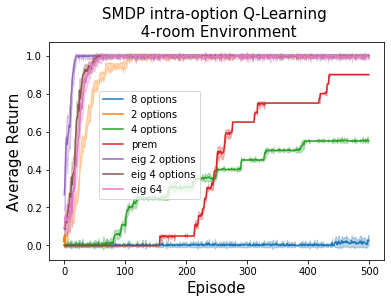

In [846]:
fig,axe=plt.subplots(1,1)
mean1=np.mean(reward_tally_alloption,0)
std1=np.std(reward_tally_alloption,0,ddof=1)
plt.plot(mean1,label='8 options')
plt.fill_between(np.arange(EpisodeNum),mean1-std1,mean1+std1,color='C0',alpha=0.3)

mean2=np.mean(reward_tally_2option,0)
std2=np.std(reward_tally_2option,0,ddof=1)
plt.plot(mean2,std2,label='2 options')
plt.fill_between(np.arange(EpisodeNum),mean2-std2,mean2+std2,color='C1',alpha=0.3)

mean3=np.mean(reward_tally_4option,0)
std3=np.std(reward_tally_4option,0,ddof=1)
plt.plot(mean3,label='4 options')
plt.fill_between(np.arange(EpisodeNum),mean3-std3,mean3+std3,color='C2',alpha=0.3)

mean4=np.mean(reward_tally_premi,0)
std4=np.std(reward_tally_premi,0,ddof=1)
plt.plot(mean4,label='prem')
plt.fill_between(np.arange(EpisodeNum),mean4-std4,mean4+std4,color='C3',alpha=0.3)

mean5=np.mean(reward_tally_eig2,0)
std5=np.std(reward_tally_eig2,0,ddof=1)
plt.plot(mean5,label='eig 2 options')
plt.fill_between(np.arange(EpisodeNum),mean5-std5,mean5+std5,color='C4',alpha=0.3)

mean5=np.mean(reward_tally_eig4,0)
std5=np.std(reward_tally_eig4,0,ddof=1)
plt.plot(mean5,label='eig 4 options')
plt.fill_between(np.arange(EpisodeNum),mean5-std5,mean5+std5,color='C5',alpha=0.3)

mean6=np.mean(reward_tally_eig64,0)
std6=np.std(reward_tally_eig64,0,ddof=1)
plt.plot(mean6,label='eig 64')
plt.fill_between(np.arange(EpisodeNum),mean6-std6,mean6+std6,color='C6',alpha=0.3)

axe.legend(loc='upper center', bbox_to_anchor=(0.3, 0.8))
axe.set_ylabel('Average Return',fontsize=15)
axe.set_xlabel('Episode',fontsize=15)
axe.set_title('SMDP intra-option Q-Learning \n 4-room Environment',fontsize=15)

In [862]:
agent=IntraOptionQLearningAgent(options_full[:6])

goal_idx=env._getStateIndex(1,12) #goal is upper right

env.defineRewardFunction(None)
env.defineGoalState(goal_idx)
start_idx=env._getStateIndex(12,1) #start is lower left
env.defineStartState(start_idx)
    
n_steps,cumulative_reward=agent.run_episode(env,max_stepnum=EpisodeLen,start_new=True,learning_flag=False,verbose=False)


115
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interrupt
interr

In [849]:
reward_tally_4option_test=run_many_experiments(env_path,options_full[:8],EpisodeLen=EpisodeLen,EpisodeNum=EpisodeNum,testNum=testNum)
print('done')

done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done


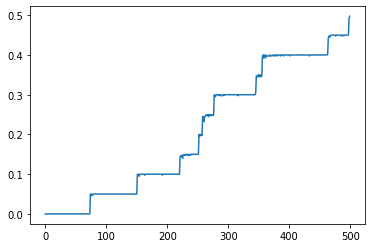

In [853]:
plt.plot(np.mean(reward_tally_4option_test,0))

## Learn options by eigenvalues

In [642]:
from PR_options import findEigenReward
eigenvectors=findEigenReward(env_path)

In [697]:
np.linalg.norm(eigenvectors[:,-2])

0.007007104103525598

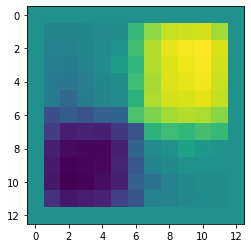

In [703]:
plt.imshow(eigenvectors[:,-2].reshape((env.numRows,env.numCols))/np.linalg.norm(eigenvectors[:,-2]))

In [834]:
def learnOptionEigen(env_path,pseudoreward):
    env = GridWorld(path = env_path, useNegativeRewards=False)
    numStates=env.numStates
    env.defineRewardFunction(pseudoreward)
    indeces=findNoWallState(env)
    
    subgoal_idx=np.argmax(pseudoreward)
    I=np.zeros(numStates)
    I[indeces]=1
    I[goal_idx]=0

    polIter = Learning(0.9, env, augmentActionSet=True)
    V, pi = polIter.solvePolicyIteration_subsetStates(np.argwhere(I).ravel(),theta=0.001)
    pi=pi[:numStates]
    
    beta=np.zeros(numStates)+1
    beta[indeces]=0
    beta[pi==4]=1
    
    current_option=Option(str(subgoal_idx))
    current_option.setIBetaPi(I,beta,pi)
    
    return current_option

In [805]:
pseudoreward=eigenvectors[:,-2]/np.linalg.norm(eigenvectors[:,-2])
subgoal_idx=np.argmax(pseudoreward)
I=np.zeros(numStates)
I[indeces]=1
I[goal_idx]=0
beta=np.zeros(numStates)
beta[goal_idx]=1
    
env = GridWorld(path = env_path, useNegativeRewards=False)
env.defineRewardFunction(pseudoreward)
polIter = Learning(0.9, env, augmentActionSet=True)
V, pi = polIter.solvePolicyIteration_subsetStates(np.argwhere(I).ravel(),theta=0.001)

103


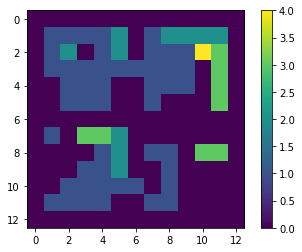

In [806]:
plt.imshow(pi[:169].reshape(13,13))
plt.colorbar()

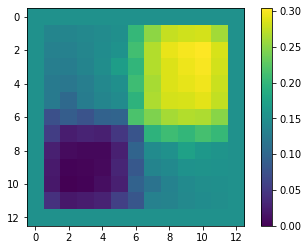

In [755]:
plt.imshow(pseudoreward.reshape(13,13)-np.min(pseudoreward))
plt.colorbar()

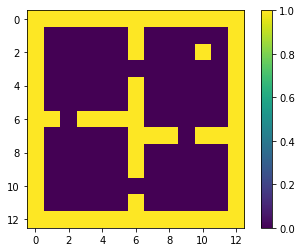

In [838]:
plt.imshow(options_eig_full[4].beta.reshape(13,13))
plt.colorbar()

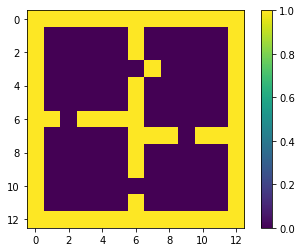

In [837]:
plt.imshow(options_full[4].beta.reshape(13,13))
plt.colorbar()

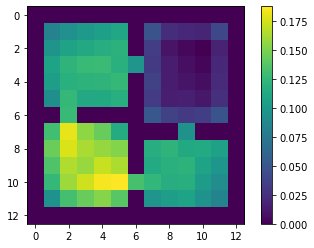

In [739]:
plt.imshow(V[:169].reshape(13,13))
plt.colorbar()

In [835]:
# learn policy
simulate_num=64
options_eig=[]
numStates=env_plot.numStates
for simulate_idx in range(simulate_num):
    pseudoreward=eigenvectors[:,-simulate_idx]/np.linalg.norm(eigenvectors[:,-simulate_idx])
    
    current_option=learnOptionEigen(env_path,pseudoreward)
    options_eig.append(current_option)
    
    current_option=learnOptionEigen(env_path,-pseudoreward)
    options_eig.append(current_option)

103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103
103


In [842]:
options_eig_full=premi_options+options_eig[4:]
print(len(options_eig_full))

128


In [845]:
reward_tally_eig2=run_many_experiments(env_path,options_eig_full[:(4+2)],testNum,EpisodeNum,EpisodeLen)
print('done')
reward_tally_eig4=run_many_experiments(env_path,options_eig_full[:8],testNum,EpisodeNum,EpisodeLen)
print('done')
reward_tally_eig64=run_many_experiments(env_path,options_eig_full[:(4+64)],testNum,EpisodeNum,EpisodeLen)
print('done')
reward_tally_eig128=run_many_experiments(env_path,options_eig_full[:(4+128)],testNum,EpisodeNum,EpisodeLen)
print('done')

done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done
done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done
done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
done repeat 8
done repeat 9
done repeat 10
done repeat 11
done repeat 12
done repeat 13
done repeat 14
done repeat 15
done repeat 16
done repeat 17
done repeat 18
done repeat 19
done
done repeat 0
done repeat 1
done repeat 2
done repeat 3
done repeat 4
done repeat 5
done repeat 6
done repeat 7
don